In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:

# define below the list of pairs of reasoning levels, in the form of reasoning level of Agent 1 vs Agent 2
# use -1 to indicate using R2-B2_Lite and reasoning at level 1
reasoning_level_list = [[0, 0],
                       [1, 0],
                       [-1, 0],
                       [2, 1], 
                       [3, 2]]

all_regret_avg_player_1_mean_list = []
all_regret_avg_player_1_stderr_list = []

# game_type in {"constant_sum", "general_sum", "common_payoff"}
game_type = "general_sum"

# level_zero_policy in {"gp_mw", "random", "bandit"}
level_zero_policy = "gp_mw"

log_directory = "results_" + game_type + "_" + level_zero_policy

eta = 0.1
length_scale = 0.1

N_iter = 5

for r in range(len(reasoning_level_list)):
    reasoning_level_1 = reasoning_level_list[r][0]
    reasoning_level_2 = reasoning_level_list[r][1]

    func_list = np.arange(0, 10)

    all_regret_avg_player_1 = []
    all_regret_avg_player_2 = []
    for i in func_list:
        for j in range(N_iter):
            if reasoning_level_1 == -1:
                log_file_name = log_directory + "/r2b2_levels_" + str(1) + "_" + \
                            str(reasoning_level_2) + "_eta_" + str(eta) + "_func_" + str(i) + \
                            "_iter_" + str(j) + "_ls_" + str(length_scale) + "_r2b2_lite.p"
            elif reasoning_level_2 == -1:
                log_file_name = log_directory + "/r2b2_levels_" + str(reasoning_level_1) + "_" + \
                            str(1) + "_eta_" + str(eta) + "_func_" + str(i) + \
                            "_iter_" + str(j) + "_ls_" + str(length_scale) + "_r2b2_lite.p"
            else:
                log_file_name = log_directory + "/r2b2_levels_" + str(reasoning_level_1) + "_" + \
                            str(reasoning_level_2) + "_eta_" + str(eta) + "_func_" + str(i) + \
                            "_iter_" + str(j) + "_ls_" + str(length_scale) + ".p"

            res = pickle.load(open(log_file_name, "rb"))
            
            values_1 = res["all"]["F_1"]
            init_1 = res["all"]["init"]["F_1"]
            values_1 = 1 - np.array(values_1)
            values_1 = np.squeeze(values_1)
            values_1_avg = np.cumsum(values_1) / (np.arange(len(values_1)) + 1)
            all_regret_avg_player_1.append(values_1_avg)

    all_regret_avg_player_1 = np.array(all_regret_avg_player_1)
    
    all_regret_avg_player_1_mean = np.mean(all_regret_avg_player_1, axis=0)

    all_regret_avg_player_1_stderr = np.std(all_regret_avg_player_1, axis=0) / np.sqrt(all_regret_avg_player_1.shape[0])

    all_regret_avg_player_1_mean_list.append(all_regret_avg_player_1_mean)
    all_regret_avg_player_1_stderr_list.append(all_regret_avg_player_1_stderr)


N_total = len(all_regret_avg_player_1_mean_list)
ub_player_1_list = []
lb_player_1_list = []
for i in range(N_total):
    ub_player_1_list.append(all_regret_avg_player_1_mean_list[i] + all_regret_avg_player_1_stderr_list[i])
    lb_player_1_list.append(all_regret_avg_player_1_mean_list[i] - all_regret_avg_player_1_stderr_list[i])


In [3]:

def plot_mean_and_CI_with_marker(time_steps, mean, lb, ub, color_mean=None, color_shading=None, marker=None, marker_size=12):
    plt.fill_between(time_steps, ub, lb,
                     color=color_shading, alpha=.2)
    plt.plot(time_steps, mean, color_mean, marker=marker, markersize=marker_size, markevery=10)


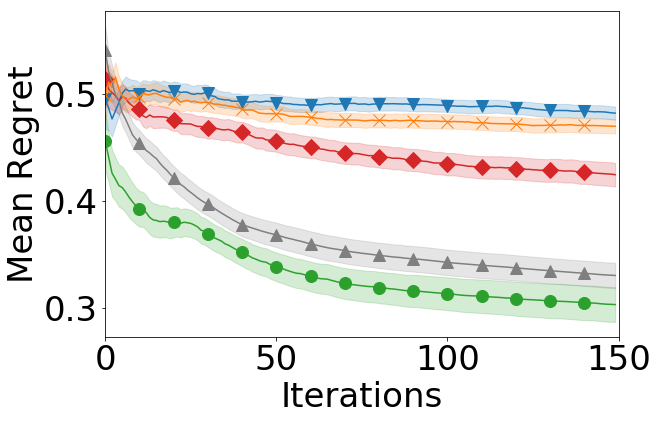

In [4]:

lw = 2.0
plt.rc('font', size=34)
plt.figure(figsize=(9.2, 6))
marker_size = 12

color_list = ["tab:blue", "tab:red", "tab:orange", "tab:green", "tab:gray", "tab:cyan", "tab:purple", "tab:olive", "tab:pink"]
marker_list = ["v", "D", "x", "o", "^", "s"]


N_total = len(all_regret_avg_player_1_mean_list)
inds = np.arange(len(all_regret_avg_player_1_mean_list[0]))

inspect_list = np.arange(N_total)
for i in inspect_list:
    plot_mean_and_CI_with_marker(inds, all_regret_avg_player_1_mean_list[i], lb_player_1_list[i], ub_player_1_list[i], \
                     color_mean=color_list[i], color_shading=color_list[i], marker=marker_list[i], marker_size=12)

# plt.legend(("Lv 0 vs. Lv 0", "Lv 1 vs. Lv 0", "Lv 1 vs. Lv 0 (R2-B2-Lite)", "Lv 2 vs. Lv 1", "Lv 3 vs. Lv 2"), \
#               prop={'size':24}, loc='lower right', framealpha=0.7)

axes = plt.gca()
axes.set_xlim([0, len(all_regret_avg_player_1_mean_list[0])])

plt.ylabel("Mean Regret")
plt.xlabel("Iterations")

plt.show()
